In [1]:
import numpy as np
import mat73
import mne
import matplotlib.pyplot as plt
from scipy import signal
import scipy.io as sio
import os
import pickle
import dyn_comms_toolbox

In [9]:
folder = './EEG_dot'

In [10]:
file_list = os.listdir(path=folder)
file_list = [fn for fn in os.listdir(path=folder) if fn.endswith('pkl')]

In [11]:
matrices = []
for file in file_list:
    input_name = folder + '/' + file
    with open(input_name, 'rb') as f:
        conn_matrices = pickle.load(f)
    matrices.append(conn_matrices[0])

In [12]:
param_search_results = dyn_comms_toolbox.parameter_search(matrices,0.2,2.0,0.04,0.2,3)

In [13]:
param_search_results

([[1.0, 0.04],
  [1.1111111111111112, 0.022222222222222227],
  [1.0962962962962963, 0.02090534979423869]],
 [array([[0.8       , 1.        , 1.2       , 1.4       , 1.6       ,
          1.8       , 2.        ],
         [3.14035496, 0.19173346, 0.89136162, 1.97646855, 2.69513195,
          3.3892732 , 4.13286098]]),
  array([[0.8       , 0.84444444, 0.88888889, 0.93333333, 0.97777778,
          1.02222222, 1.06666667, 1.11111111, 1.15555556, 1.2       ],
         [4.09103077, 0.52991791, 1.43900339, 0.20505849, 0.29354716,
          0.38619371, 0.43098331, 0.08240468, 0.52383449, 0.85065826]]),
  array([[1.06666667, 1.07654321, 1.08641975, 1.0962963 , 1.10617284,
          1.11604938, 1.12592593, 1.13580247, 1.14567901, 1.15555556],
         [0.45888622, 0.37380606, 0.14832172, 0.02089406, 0.02544736,
          0.20059348, 0.29090633, 0.3402781 , 0.46109974, 0.50039969]])],
 [array([[0.04      , 0.05777778, 0.07555556, 0.09333333, 0.11111111,
          0.12888889, 0.14666667, 0.164444

In [2]:
def save_obj(obj, name ):
    with open(name, 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        
save_obj(param_search_results, 'EEG_search_result.pck')

NameError: name 'param_search_results' is not defined

In [3]:
with open('EEG_search_result.pck', 'rb') as f:
    param_search_results = pickle.load(f)

In [20]:
gamma,omega = param_search_results[0][2]

In [21]:
comm_struct, gamma, omega, q = dyn_comms_toolbox.dynamic_louvain(matrices[0], gamma, omega)

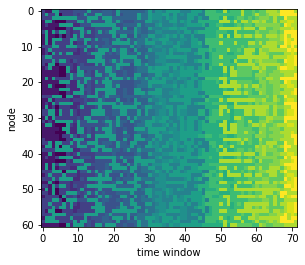

In [22]:
plt.imshow(np.transpose(comm_struct))
plt.xlabel('time window')
plt.ylabel('node')
plt.show()